## RWC Score predictor project

I am going to use this Notebook to document my project of creating a RWC score predictor using a Neural network. This is my attempt at implementing [An end-to-end machine learning project with Python Pandas, Keras, Flask, Docker and Heroku](https://towardsdatascience.com/an-end-to-end-machine-learning-project-with-python-pandas-keras-flask-docker-and-heroku-c987018c42c7) orgininally by [Ryan Lamb](https://www.ryanericlamb.com/).


# Gathering data

Before I can even begin to think of training a machine learning model, I need to create a data set that I can use for training. Ryan used [BeautifulSoup](https://www.codecademy.com/resources/blog/web-scraping-python-beautiful-soup-mlb-stats/?source=post_page-----f699fd552673--------------------------------) to do this, and I will follow suit. First I have to install the required dependencies in order to extract information from an applicable website. The **Requests** library allows Python to access the source code of the website and **BeautifulSoup** parses website data based on HTML tags. I will install them using pip.

`pip install requests beautifulsoup4`

I installed pandas as well (To simplify data processing) and regex (The tutorial I was following said it might be useful)

`pip install pandas`
`pip install regex`


Now lets import these libraries!


In [15]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import PyPDF2


I had initially planned to scrape data from the ESPN Scrum archive. However upon investigation I discovered that this archive was no longer being maintained. After some searching I found the [Statbunker](https://rugby.statbunker.com/) site, which maintains international rugby results from 2003 onwards. I will now attempt to scrape this page.

In [2]:
# I will use this list to modifiy the URL to iterate through all the pages I need. These option_values will be passed
# as a value for the "comp_id" parameter that forms a part of the URL.

comp_id = [
                    "727_724_723",
                    "715_675_699",
                    "686_682",
                    "653_648",
                    "606_622_608_607",
                    "595_592_580",
                    "571_568_556",
                    "538_536_528",
                    "449_510_484",
                    "479_475_463",
                    "448_445_431",
                    "420_416",
                    "356_396_376_399",
                    "349_348_372",
                    "334_330_316",
                    "293_295",
                    "246_263_270",
                    "239_221_216_238",
                    "208_199_200",
                    "179_173_145",
                    "84_141_137_118",
                    "85_63_61",
                    "60_34_31",
                    "17_14_8",
                    "99_67_108_12",
                    "152",
                    "202_266",
                    "267",
                    "240",
                    "244",
                    "245"]



ChatGPT to the rescue! I asked it to help me use BeatifulSoup to parse the website data.



In [57]:
# Initialize an empty list to store the results
results = []

for j in range(len(comp_id)):
    # These two values will be used to iterate through the pages for each year
    limit = 10
    offset = 0

    while offset < 100:
        # Change the url to the appropriate page
        url = ""
        url = 'https://rugby.statbunker.com/competitions/LastMatches?comp_id='+ comp_id[j]+'&limit=10&offs=UTC&offset=' + str(offset) 
        print(url)
        
        offset += limit
        # Send a request to the server
        page = requests.get(url)

        # Parse the text by means of the HTML parser built into BeautifulSoup
        soup = BeautifulSoup(page.text,'html.parser')
        nextDate = soup.find_next('div.upcomingMatchesTitle h3')
        
        upcoming_matches_divs = soup.find_all('div', class_='upcomingMatchesTitle slateGrey')
        
        for upcoming_matches_div in upcoming_matches_divs:
            
            # Extract the date from the current div
            match_date = upcoming_matches_div.find('h3').text.strip()
    
            # Find the corresponding "matchLineup" ul for the current div
            match_lineup_ul = upcoming_matches_div.find_next('ul', class_='matchLineup')
    
            # Find all match lineup items within the ul
            match_lineup_items = match_lineup_ul.find_all('li')

            for k in range(len(match_lineup_items)):
                match_item = match_lineup_items[k]
                team1 = match_item.select_one('.matchTeam p').text.strip()
                vs = match_item.select_one('.matchVs p').text.strip()

                team1_score = ""
                team2_score = ""
                i = 0
                while vs[i] != ' ':
                     team1_score += vs[i]
                     i+=1

                team2_score = vs[i+3:len(vs)]
                team2 = match_item.select('.matchTeam p')[-1].text.strip()

                # Append the extracted values to the results list
                results.append([team1, int(team1_score), team2, int(team2_score), match_date])


df = pd.DataFrame(results, columns=["Team1", "Team1Score", "Team2", "Team2Score", "Date"])

print(df)


https://rugby.statbunker.com/competitions/LastMatches?comp_id=727_724_723&limit=10&offs=UTC&offset=0
https://rugby.statbunker.com/competitions/LastMatches?comp_id=727_724_723&limit=10&offs=UTC&offset=10
https://rugby.statbunker.com/competitions/LastMatches?comp_id=727_724_723&limit=10&offs=UTC&offset=20
https://rugby.statbunker.com/competitions/LastMatches?comp_id=727_724_723&limit=10&offs=UTC&offset=30
https://rugby.statbunker.com/competitions/LastMatches?comp_id=727_724_723&limit=10&offs=UTC&offset=40
https://rugby.statbunker.com/competitions/LastMatches?comp_id=727_724_723&limit=10&offs=UTC&offset=50
https://rugby.statbunker.com/competitions/LastMatches?comp_id=727_724_723&limit=10&offs=UTC&offset=60
https://rugby.statbunker.com/competitions/LastMatches?comp_id=727_724_723&limit=10&offs=UTC&offset=70
https://rugby.statbunker.com/competitions/LastMatches?comp_id=727_724_723&limit=10&offs=UTC&offset=80
https://rugby.statbunker.com/competitions/LastMatches?comp_id=727_724_723&limit=10&

https://rugby.statbunker.com/competitions/LastMatches?comp_id=449_510_484&limit=10&offs=UTC&offset=10
https://rugby.statbunker.com/competitions/LastMatches?comp_id=449_510_484&limit=10&offs=UTC&offset=20
https://rugby.statbunker.com/competitions/LastMatches?comp_id=449_510_484&limit=10&offs=UTC&offset=30
https://rugby.statbunker.com/competitions/LastMatches?comp_id=449_510_484&limit=10&offs=UTC&offset=40
https://rugby.statbunker.com/competitions/LastMatches?comp_id=449_510_484&limit=10&offs=UTC&offset=50
https://rugby.statbunker.com/competitions/LastMatches?comp_id=449_510_484&limit=10&offs=UTC&offset=60
https://rugby.statbunker.com/competitions/LastMatches?comp_id=449_510_484&limit=10&offs=UTC&offset=70
https://rugby.statbunker.com/competitions/LastMatches?comp_id=449_510_484&limit=10&offs=UTC&offset=80
https://rugby.statbunker.com/competitions/LastMatches?comp_id=449_510_484&limit=10&offs=UTC&offset=90
https://rugby.statbunker.com/competitions/LastMatches?comp_id=479_475_463&limit=10

https://rugby.statbunker.com/competitions/LastMatches?comp_id=246_263_270&limit=10&offs=UTC&offset=20
https://rugby.statbunker.com/competitions/LastMatches?comp_id=246_263_270&limit=10&offs=UTC&offset=30
https://rugby.statbunker.com/competitions/LastMatches?comp_id=246_263_270&limit=10&offs=UTC&offset=40
https://rugby.statbunker.com/competitions/LastMatches?comp_id=246_263_270&limit=10&offs=UTC&offset=50
https://rugby.statbunker.com/competitions/LastMatches?comp_id=246_263_270&limit=10&offs=UTC&offset=60
https://rugby.statbunker.com/competitions/LastMatches?comp_id=246_263_270&limit=10&offs=UTC&offset=70
https://rugby.statbunker.com/competitions/LastMatches?comp_id=246_263_270&limit=10&offs=UTC&offset=80
https://rugby.statbunker.com/competitions/LastMatches?comp_id=246_263_270&limit=10&offs=UTC&offset=90
https://rugby.statbunker.com/competitions/LastMatches?comp_id=239_221_216_238&limit=10&offs=UTC&offset=0
https://rugby.statbunker.com/competitions/LastMatches?comp_id=239_221_216_238&l

https://rugby.statbunker.com/competitions/LastMatches?comp_id=99_67_108_12&limit=10&offs=UTC&offset=30
https://rugby.statbunker.com/competitions/LastMatches?comp_id=99_67_108_12&limit=10&offs=UTC&offset=40
https://rugby.statbunker.com/competitions/LastMatches?comp_id=99_67_108_12&limit=10&offs=UTC&offset=50
https://rugby.statbunker.com/competitions/LastMatches?comp_id=99_67_108_12&limit=10&offs=UTC&offset=60
https://rugby.statbunker.com/competitions/LastMatches?comp_id=99_67_108_12&limit=10&offs=UTC&offset=70
https://rugby.statbunker.com/competitions/LastMatches?comp_id=99_67_108_12&limit=10&offs=UTC&offset=80
https://rugby.statbunker.com/competitions/LastMatches?comp_id=99_67_108_12&limit=10&offs=UTC&offset=90
https://rugby.statbunker.com/competitions/LastMatches?comp_id=152&limit=10&offs=UTC&offset=0
https://rugby.statbunker.com/competitions/LastMatches?comp_id=152&limit=10&offs=UTC&offset=10
https://rugby.statbunker.com/competitions/LastMatches?comp_id=152&limit=10&offs=UTC&offset=2

In [65]:
# Convert the "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%A %d %B %Y")

# Sort the DataFrame by date
df.sort_values(by='Date', ascending = False, inplace=True)

print(df)

            Team1  Team1Score          Team2  Team2Score       Date
32         France          41      Australia          17 2023-08-27
28        England          22           Fiji          30 2023-08-26
29          Italy          42          Japan          21 2023-08-26
30       Scotland          33        Georgia           6 2023-08-26
31        Ireland          17     Manu Samoa          13 2023-08-26
...           ...         ...            ...         ...        ...
1699        Japan          18  United States          21 1987-05-23
1697       France          20       Scotland          20 1987-05-23
1698      Romania          21       Zimbabwe          20 1987-05-22
1696    Australia          19        England           6 1987-05-22
1695  New Zealand          70          Italy           6 1987-05-21

[1727 rows x 5 columns]


In [66]:
df.to_csv('output.csv', index=False)

In [75]:
# Open the saved HTML file
with open("Men's Rankings World Rugby.htm", 'r', encoding='utf-8') as file:
    html_content = file.read()


# Find the table containing the rankings
rankings_table = soup.find_all(attrs={'class':'wr-table__table-body'})
#print(rankings_table)

# Extract rows from the table
teams = rankings_table[1].find_all(attrs={'class':'wr-table__cell wr-table__cell--team','class':'table__last-position','class':'wr-table__cell wr-table__cell--points'})
positions = rankings_table[1].find_all(attrs={'class':'wr-table__cell-content'})
points = rankings_table[1].find_all('td',attrs={'class':'wr-table__cell wr-table__cell--points'})
print(*teams,sep ='\n')
print(*positions,sep ='\n')
print(*points,sep ='\n')
# # Loop through rows to extract data
# for row in rows:
#     cells = row.find_all("div")
#     print(cells)
#     if cells:
#         position = cells[0].text.strip()
#         team_name = cells[2].text.strip()
#         points = cells[3].text.strip()
#         print(f"Position: {position}, Team: {team_name}, Points: {points}")

<td class="wr-table__cell wr-table__cell--points">92.31</td>
<td class="wr-table__cell wr-table__cell--points">87.89</td>
<td class="wr-table__cell wr-table__cell--points">87.30</td>
<td class="wr-table__cell wr-table__cell--points">86.05</td>
<td class="wr-table__cell wr-table__cell--points">82.79</td>
<td class="wr-table__cell wr-table__cell--points">81.03</td>
<td class="wr-table__cell wr-table__cell--points">77.43</td>
<td class="wr-table__cell wr-table__cell--points">77.05</td>
<td class="wr-table__cell wr-table__cell--points">75.50</td>
<td class="wr-table__cell wr-table__cell--points">73.27</td>
<td class="wr-table__cell wr-table__cell--points">71.73</td>
<td class="wr-table__cell wr-table__cell--points">71.03</td>
<td class="wr-table__cell wr-table__cell--points">68.68</td>
<td class="wr-table__cell wr-table__cell--points">68.19</td>
<td class="wr-table__cell wr-table__cell--points">66.59</td>
<td class="wr-table__cell wr-table__cell--points">65.66</td>
<td class="wr-table__cel

In [2]:
import requests

api_url = "https://api.wr-rims-prod.pulselive.com/rugby/v3/rankings/mru?language=en&date=2023-09-02"
response = requests.get(api_url)

# # Check rate limit headers in the response
# limit = response.headers.get('X-RateLimit-Limit')
# remaining = response.headers.get('X-RateLimit-Remaining')
# reset_time = response.headers.get('X-RateLimit-Reset')

print(response.headers)

print(f"Rate Limit: {limit}")
print(f"Remaining Requests: {remaining}")
print(f"Reset Time (UTC): {reset_time}")

{'Content-Type': 'application/json;charset=UTF-8', 'Content-Length': '7392', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Date': 'Sat, 02 Sep 2023 09:18:47 GMT', 'strict-transport-security': 'max-age=300; includeSubDomains', 'Vary': 'Origin', 'X-Cache': 'Hit from cloudfront', 'Via': '1.1 dc3672c035c4067467baeecc5fb7945a.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'JNB50-C1', 'X-Amz-Cf-Id': 'gMUfrIQXF4DSUqTyVN8B9DhUEqh-uJwD3wIRMtr5WWaK58uldfcoVg==', 'Age': '25'}
Rate Limit: None
Remaining Requests: None
Reset Time (UTC): None


In [4]:
import pandas as pd
import requests
from datetime import datetime
import time

# List of dates in "YYYY/MM/DD" format
dates_to_fetch_str = """
2023/08/27
2023/08/26
2023/08/26
2023/08/26
2023/08/26
2023/08/25
2023/08/19
2023/08/19
2023/08/19
2023/08/19
2023/08/19
2023/08/16
2023/08/12
2023/08/12
2023/08/12
2023/08/12
2023/08/12
2023/08/10
2023/08/05
2023/08/05
2023/08/05
2023/08/05
2023/08/05
2023/08/05
2023/08/05
2023/07/29
2023/07/29
2023/07/29
2023/07/29
2023/07/15
2023/07/15
2023/07/08
2023/07/08
2023/02/25
2023/02/12
2023/02/11
2023/02/11
2023/02/05
2023/02/04
2023/02/04
2022/11/19
2022/11/19
2022/11/19
2022/11/19
2022/11/19
2022/11/19
2022/11/19
2022/11/13
2022/11/13
2022/11/12
2022/11/12
2022/11/12
2022/11/12
2022/11/12
2022/11/12
2022/11/12
2022/11/12
2022/11/12
2022/11/06
2022/11/06
2022/11/05
2022/11/05
2022/11/05
2022/11/05
2022/11/05
2022/11/05
2022/11/05
2022/10/29
2022/10/29
2022/09/17
2022/09/03
2022/09/03
2022/08/27
2022/08/13
2022/08/13
2022/08/06
2022/08/06
2022/07/16
2022/07/16
2022/07/16
2022/07/16
2022/07/16
2022/07/16
2022/07/10
2022/07/10
2022/07/10
2022/07/09
2022/07/09
2022/07/09
2022/07/09
2022/07/09
2022/07/02
2022/07/02
2022/07/02
2022/07/02
2022/07/02
2022/07/02
2022/07/01
2022/06/25
2022/06/25
2022/06/18
2022/03/19
2022/03/19
2022/03/12
2022/03/12
2022/03/11
2022/02/27
2022/02/26
2022/02/26
2022/02/13
2022/02/12
2022/02/12
2022/02/06
2022/02/05
2022/02/05
2021/11/26
2021/11/21
2021/11/20
2021/11/20
2021/11/20
2021/11/20
2021/11/20
2021/11/20
2021/11/20
2021/11/20
2021/11/14
2021/11/14
2021/11/13
2021/11/13
2021/11/13
2021/11/13
2021/11/13
2021/11/13
2021/11/07
2021/11/07
2021/11/06
2021/11/06
2021/11/06
2021/11/06
2021/11/06
2021/11/06
2021/11/06
2021/10/30
2021/10/30
2021/10/23
2021/10/23
2021/10/02
2021/10/02
2021/09/25
2021/09/25
2021/09/18
2021/09/18
2021/09/12
2021/09/12
2021/09/05
2021/08/21
2021/08/14
2021/08/14
2021/08/07
2021/07/17
2021/07/17
2021/07/17
2021/07/13
2021/07/10
2021/07/10
2021/07/10
2021/07/10
2021/07/07
2021/07/04
2021/07/03
2021/07/03
2021/07/03
2021/07/03
2021/07/02
2021/03/26
2021/03/20
2021/03/20
2021/03/20
2021/03/14
2021/03/13
2021/03/13
2021/02/27
2021/02/27
2021/02/14
2021/02/13
2021/02/13
2021/02/07
2021/02/06
2021/02/06
2020/10/31
2020/10/31
2020/10/31
2020/10/24
2020/10/24
2020/10/23
2020/10/17
2020/10/11
2020/03/08
2020/03/07
2020/02/23
2020/02/22
2020/02/22
2020/02/09
2020/02/08
2020/02/08
2020/02/02
2020/02/01
2020/02/01
2019/11/02
2019/10/27
2019/10/26
2019/10/20
2019/10/20
2019/10/19
2019/10/19
2019/10/13
2019/10/13
2019/10/13
2019/10/13
2019/10/12
2019/10/12
2019/10/12
2019/10/11
2019/10/09
2019/10/09
2019/10/09
2019/10/08
2019/10/06
2019/10/06
2019/10/05
2019/10/05
2019/10/05
2019/10/04
2019/10/03
2019/10/03
2019/10/02
2019/10/02
2019/09/30
2019/09/29
2019/09/29
2019/09/28
2019/09/28
2019/09/28
2019/09/26
2019/09/26
2019/09/25
2019/09/24
2019/09/23
2019/09/22
2019/09/22
2019/09/22
2019/09/21
2019/09/21
2019/09/21
2019/09/20
2019/09/08
2019/09/07
2019/09/07
2019/09/07
2019/09/06
2019/09/06
2019/09/06
2019/08/31
2019/08/31
2019/08/30
2019/08/24
2019/08/24
2019/08/17
2019/08/17
2019/08/17
2019/08/17
2019/08/17
2019/08/11
2019/08/10
2019/08/10
2019/08/10
2019/07/27
2019/07/27
2019/07/20
2019/07/20
2019/03/16
2019/03/16
2019/03/16
2019/03/10
2019/03/09
2019/03/09
2019/02/24
2019/02/23
2019/02/23
2019/02/10
2019/02/09
2019/02/09
2019/02/02
2019/02/02
2019/02/01
2018/11/24
2018/11/24
2018/11/24
2018/11/24
2018/11/24
2018/11/24
2018/11/24
2018/11/17
2018/11/17
2018/11/17
2018/11/17
2018/11/17
2018/11/17
2018/11/17
2018/11/17
2018/11/17
2018/11/17
2018/11/10
2018/11/10
2018/11/10
2018/11/10
2018/11/10
2018/11/10
2018/11/10
2018/11/10
2018/11/03
2018/11/03
2018/11/03
2018/11/03
2018/10/27
2018/10/06
2018/10/06
2018/09/29
2018/09/29
2018/09/15
2018/09/15
2018/09/08
2018/09/08
2018/08/25
2018/08/25
2018/08/18
2018/08/18
2018/06/23
2018/06/23
2018/06/23
2018/06/23
2018/06/23
2018/06/23
2018/06/23
2018/06/16
2018/06/16
2018/06/16
2018/06/16
2018/06/16
2018/06/16
2018/06/16
2018/06/09
2018/06/09
2018/06/09
2018/06/09
2018/06/09
2018/06/09
2018/06/09
2018/06/02
2018/03/17
2018/03/17
2018/03/17
2018/03/11
2018/03/10
2018/03/10
2018/02/24
2018/02/24
2018/02/23
2018/02/11
2018/02/10
2018/02/10
2018/02/04
2018/02/03
2018/02/03
2017/12/02
2017/11/25
2017/11/25
2017/11/25
2017/11/25
2017/11/25
2017/11/25
2017/11/25
2017/11/25
2017/11/25
2017/11/18
2017/11/18
2017/11/18
2017/11/18
2017/11/18
2017/11/18
2017/11/18
2017/11/18
2017/11/18
2017/11/18
2017/11/11
2017/11/11
2017/11/11
2017/11/11
2017/11/11
2017/11/11
2017/11/11
2017/11/11
2017/11/04
2017/10/21
2017/10/07
2017/10/07
2017/09/30
2017/09/30
2017/09/16
2017/09/16
2017/09/09
2017/09/09
2017/08/26
2017/08/26
2017/08/19
2017/08/19
2017/06/24
2017/06/24
2017/06/24
2017/06/24
2017/06/24
2017/06/24
2017/06/23
2017/06/17
2017/06/17
2017/06/17
2017/06/17
2017/06/17
2017/06/17
2017/06/17
2017/06/16
2017/06/16
2017/06/10
2017/06/10
2017/06/10
2017/06/10
2017/06/10
2017/06/10
2017/06/10
2017/06/10
2017/03/18
2017/03/18
2017/03/18
2017/03/11
2017/03/11
2017/03/10
2017/02/26
2017/02/25
2017/02/25
2017/02/12
2017/02/11
2017/02/11
2017/02/05
2017/02/04
2017/02/04
2016/12/03
2016/11/26
2016/11/26
2016/11/26
2016/11/26
2016/11/26
2016/11/26
2016/11/26
2016/11/26
2016/11/25
2016/11/19
2016/11/19
2016/11/19
2016/11/19
2016/11/19
2016/11/19
2016/11/19
2016/11/19
2016/11/19
2016/11/19
2016/11/12
2016/11/12
2016/11/12
2016/11/12
2016/11/12
2016/11/12
2016/11/12
2016/11/12
2016/11/05
2016/11/05
2016/11/05
2016/10/22
2016/10/08
2016/10/08
2016/10/01
2016/10/01
2016/09/17
2016/09/17
2016/09/10
2016/09/10
2016/08/27
2016/08/27
2016/08/20
2016/08/20
2016/03/19
2016/03/19
2016/03/19
2016/03/13
2016/03/12
2016/03/12
2016/02/27
2016/02/27
2016/02/26
2016/02/14
2016/02/13
2016/02/13
2016/02/07
2016/02/06
2016/02/06
2015/10/31
2015/10/30
2015/10/25
2015/10/24
2015/10/18
2015/10/18
2015/10/17
2015/10/17
2015/10/11
2015/10/11
2015/10/11
2015/10/11
2015/10/10
2015/10/10
2015/10/10
2015/10/09
2015/10/07
2015/10/07
2015/10/06
2015/10/06
2015/10/04
2015/10/04
2015/10/03
2015/10/03
2015/10/03
2015/10/02
2015/10/01
2015/10/01
2015/09/29
2015/09/27
2015/09/27
2015/09/27
2015/09/26
2015/09/26
2015/09/26
2015/09/25
2015/09/24
2015/09/23
2015/09/23
2015/09/23
2015/09/20
2015/09/20
2015/09/20
2015/09/19
2015/09/19
2015/09/19
2015/09/19
2015/09/18
2015/08/08
2015/07/25
2015/07/25
2015/07/18
2015/07/17
2015/03/21
2015/03/21
2015/03/21
2015/03/15
2015/03/14
2015/03/14
2015/03/01
2015/02/28
2015/02/28
2015/02/15
2015/02/14
2015/02/14
2015/02/07
2015/02/07
2015/02/06
2014/11/29
2014/11/29
2014/11/23
2014/11/22
2014/11/22
2014/11/22
2014/11/22
2014/11/22
2014/11/22
2014/11/22
2014/11/21
2014/11/16
2014/11/15
2014/11/15
2014/11/15
2014/11/15
2014/11/15
2014/11/15
2014/11/14
2014/11/14
2014/11/08
2014/11/08
2014/11/08
2014/11/08
2014/11/08
2014/11/08
2014/11/08
2014/11/08
2014/11/07
2014/11/01
2014/10/18
2014/10/04
2014/10/04
2014/09/27
2014/09/27
2014/09/13
2014/09/13
2014/09/06
2014/09/06
2014/08/23
2014/08/23
2014/08/16
2014/08/16
2014/06/28
2014/06/21
2014/06/21
2014/06/21
2014/06/21
2014/06/20
2014/06/14
2014/06/14
2014/06/14
2014/06/14
2014/06/14
2014/06/14
2014/06/07
2014/06/07
2014/06/07
2014/06/07
2014/06/07
2014/05/30
2014/03/15
2014/03/15
2014/03/15
2014/03/09
2014/03/08
2014/03/08
2014/02/22
2014/02/22
2014/02/21
2014/02/09
2014/02/08
2014/02/08
2014/02/02
2014/02/01
2014/02/01
2013/11/30
2013/11/24
2013/11/23
2013/11/23
2013/11/23
2013/11/23
2013/11/23
2013/11/23
2013/11/23
2013/11/23
2013/11/22
2013/11/17
2013/11/16
2013/11/16
2013/11/16
2013/11/16
2013/11/16
2013/11/16
2013/11/16
2013/11/16
2013/11/15
2013/11/15
2013/11/09
2013/11/09
2013/11/09
2013/11/09
2013/11/09
2013/11/09
2013/11/09
2013/11/09
2013/11/09
2013/11/09
2013/11/02
2013/11/02
2013/10/20
2013/10/05
2013/10/05
2013/09/28
2013/09/28
2013/09/14
2013/09/14
2013/09/07
2013/09/07
2013/08/24
2013/08/24
2013/08/17
2013/08/17
2013/06/22
2013/06/22
2013/06/15
2013/06/15
2013/06/15
2013/06/15
2013/06/08
2013/06/08
2013/06/08
2013/06/08
2013/03/16
2013/03/16
2013/03/16
2013/03/10
2013/03/09
2013/03/09
2013/02/24
2013/02/23
2013/02/23
2013/02/10
2013/02/09
2013/02/09
2013/02/03
2013/02/02
2013/02/02
2012/12/01
2012/12/01
2012/11/24
2012/11/24
2012/11/24
2012/11/24
2012/11/24
2012/11/24
2012/11/17
2012/11/17
2012/11/17
2012/11/17
2012/11/16
2012/11/11
2012/11/10
2012/11/10
2012/11/10
2012/11/10
2012/11/10
2012/11/10
2012/10/20
2012/09/08
2012/09/08
2012/08/25
2012/08/25
2012/08/18
2012/08/18
2012/06/23
2012/06/23
2012/06/23
2012/06/23
2012/06/23
2012/06/23
2012/06/22
2012/06/16
2012/06/16
2012/06/16
2012/06/16
2012/06/16
2012/06/15
2012/06/09
2012/06/09
2012/06/09
2012/06/08
2012/06/05
2012/03/17
2012/03/17
2012/03/17
2012/03/11
2012/03/10
2012/03/10
2012/03/04
2012/02/26
2012/02/25
2012/02/25
2012/02/12
2012/02/11
2012/02/05
2012/02/04
2012/02/04
2011/12/03
2011/10/22
2011/10/20
2011/10/16
2011/10/15
2011/10/09
2011/10/09
2011/10/08
2011/10/08
2011/10/02
2011/10/02
2011/10/02
2011/10/02
2011/10/01
2011/10/01
2011/10/01
2011/09/30
2011/09/28
2011/09/27
2011/09/27
2011/09/26
2011/09/25
2011/09/25
2011/09/25
2011/09/24
2011/09/24
2011/09/23
2011/09/22
2011/09/21
2011/09/20
2011/09/18
2011/09/18
2011/09/18
2011/09/17
2011/09/17
2011/09/17
2011/09/16
2011/09/15
2011/09/14
2011/09/14
2011/09/14
2011/09/11
2011/09/11
2011/09/11
2011/09/10
2011/09/10
2011/09/10
2011/09/10
2011/09/09
2011/08/27
2011/08/27
2011/08/20
2011/08/20
2011/08/20
2011/08/20
2011/08/20
2011/08/19
2011/08/13
2011/08/13
2011/08/13
2011/08/13
2011/08/06
2011/08/06
2011/08/06
2011/08/05
2011/07/30
2011/07/23
2011/07/22
2011/07/17
2011/03/19
2011/03/19
2011/03/19
2011/03/13
2011/03/12
2011/03/12
2011/02/27
2011/02/26
2011/02/26
2011/02/13
2011/02/12
2011/02/11
2011/02/05
2011/02/05
2011/02/04
2010/11/28
2010/11/27
2010/11/27
2010/11/27
2010/11/27
2010/11/27
2010/11/27
2010/11/27
2010/11/27
2010/11/20
2010/11/20
2010/11/20
2010/11/20
2010/11/20
2010/11/20
2010/11/19
2010/11/19
2010/11/13
2010/11/13
2010/11/13
2010/11/13
2010/11/13
2010/11/13
2010/11/13
2010/11/13
2010/11/06
2010/11/06
2010/11/06
2010/11/05
2010/10/30
2010/10/30
2010/06/26
2010/06/25
2010/06/25
2010/06/25
2010/06/18
2010/06/18
2010/06/18
2010/06/18
2010/06/11
2010/06/11
2010/06/11
2010/06/11
2010/06/04
2010/06/04
2010/03/20
2010/03/20
2010/03/20
2010/03/13
2010/03/13
2010/03/12
2010/02/26
2010/02/26
2010/02/25
2010/02/13
2010/02/13
2010/02/12
2010/02/06
2010/02/05
2010/02/05
2009/11/27
2009/11/27
2009/11/27
2009/11/27
2009/11/27
2009/11/20
2009/11/20
2009/11/20
2009/11/20
2009/11/20
2009/11/20
2009/11/14
2009/11/13
2009/11/13
2009/11/13
2009/11/12
2009/11/12
2009/11/06
2009/11/06
2009/10/30
2009/09/18
2009/09/11
2009/09/04
2009/08/28
2009/08/21
2009/08/07
2009/07/31
2009/07/24
2009/07/17
2009/06/26
2009/06/26
2009/06/19
2009/06/19
2009/06/12
2009/06/12
2009/06/12
2009/06/05
2009/06/05
2009/05/30
2009/05/29
2009/05/22
2009/03/20
2009/03/20
2009/03/20
2009/03/15
2009/03/13
2009/03/13
2009/02/27
2009/02/27
2009/02/26
2009/02/14
2009/02/13
2009/02/13
2009/02/07
2009/02/06
2009/02/06
2008/11/28
2008/11/28
2008/11/21
2008/11/21
2008/11/21
2008/11/21
2008/11/21
2008/11/21
2008/11/21
2008/11/15
2008/11/14
2008/11/14
2008/11/14
2008/11/14
2008/11/14
2008/11/13
2008/11/07
2008/11/07
2008/11/07
2008/11/07
2008/11/07
2008/11/07
2008/10/31
2008/09/12
2008/09/02
2008/08/29
2008/08/22
2008/08/15
2008/08/08
2008/08/01
2008/07/25
2008/07/18
2008/07/11
2008/07/04
2008/07/04
2008/06/27
2008/06/27
2008/06/20
2008/06/20
2008/06/13
2008/06/13
2008/06/13
2008/06/13
2008/06/06
2008/06/06
2008/06/06
2008/03/15
2008/03/14
2008/03/14
2008/03/09
2008/03/08
2008/03/07
2008/02/22
2008/02/22
2008/02/22
2008/02/09
2008/02/08
2008/02/08
2008/02/02
2008/02/01
2008/02/01
2007/11/23
2007/10/18
2007/10/13
2007/10/12
2007/10/06
2007/10/06
2007/10/05
2007/10/05
2007/09/29
2007/09/29
2007/09/29
2007/09/28
2007/09/28
2007/09/28
2007/09/28
2007/09/27
2007/09/25
2007/09/25
2007/09/24
2007/09/24
2007/09/22
2007/09/22
2007/09/21
2007/09/21
2007/09/21
2007/09/20
2007/09/19
2007/09/18
2007/09/17
2007/09/15
2007/09/15
2007/09/15
2007/09/14
2007/09/14
2007/09/14
2007/09/13
2007/09/11
2007/09/11
2007/09/11
2007/09/10
2007/09/08
2007/09/08
2007/09/08
2007/09/08
2007/09/07
2007/09/07
2007/09/07
2007/09/06
2007/08/25
2007/08/24
2007/08/23
2007/08/17
2007/08/17
2007/08/14
2007/08/10
2007/08/10
2007/08/03
2007/07/20
2007/07/13
2007/07/06
2007/06/29
2007/06/22
2007/06/15
2007/06/15
2007/06/08
2007/06/08
2007/06/08
2007/06/08
2007/06/01
2007/06/01
2007/06/01
2007/06/01
2007/05/25
2007/05/25
2007/05/25
2007/03/16
2007/03/16
2007/03/16
2007/03/10
2007/03/09
2007/03/09
2007/02/23
2007/02/23
2007/02/23
2007/02/10
2007/02/09
2007/02/09
2007/02/03
2007/02/02
2007/02/02
2006/11/25
2006/11/24
2006/11/24
2006/11/24
2006/11/24
2006/11/24
2006/11/18
2006/11/17
2006/11/17
2006/11/17
2006/11/17
2006/11/16
2006/11/10
2006/11/10
2006/11/10
2006/11/10
2006/11/10
2006/11/10
2006/11/04
2006/11/03
2006/06/23
2006/06/23
2006/06/23
2006/06/17
2006/06/16
2006/06/16
2006/06/16
2006/06/16
2006/06/16
2006/06/10
2006/06/10
2006/06/09
2006/06/09
2006/06/09
2006/05/14
2006/03/17
2006/03/17
2006/03/17
2006/03/11
2006/03/10
2006/03/10
2006/02/25
2006/02/24
2006/02/24
2006/02/11
2006/02/10
2006/02/10
2006/02/04
2006/02/03
2006/02/03
2005/12/03
2005/11/25
2005/11/25
2005/11/25
2005/11/25
2005/11/25
2005/11/25
2005/11/19
2005/11/18
2005/11/18
2005/11/18
2005/11/18
2005/11/18
2005/11/18
2005/11/18
2005/11/12
2005/11/11
2005/11/11
2005/11/11
2005/11/11
2005/11/10
2005/11/04
2005/11/04
2005/11/04
2005/09/01
2005/08/26
2005/08/19
2005/08/12
2005/08/05
2005/07/29
2005/07/22
2005/07/08
2005/07/01
2005/06/24
2005/06/24
2005/06/18
2005/06/17
2005/06/11
2005/06/10
2005/06/10
2005/06/10
2005/06/09
2005/06/03
2005/03/18
2005/03/18
2005/03/18
2005/03/12
2005/03/11
2005/03/11
2005/02/27
2005/02/26
2005/02/26
2005/02/13
2005/02/11
2005/02/11
2005/02/06
2005/02/04
2005/02/04
2004/12/03
2004/11/26
2004/11/26
2004/11/26
2004/11/26
2004/11/26
2004/11/25
2004/11/20
2004/11/20
2004/11/19
2004/11/19
2004/11/19
2004/11/19
2004/11/12
2004/11/12
2004/11/12
2004/11/12
2004/11/12
2004/11/11
2004/11/05
2004/11/05
2004/11/05
2004/08/20
2004/08/13
2004/08/06
2004/07/30
2004/07/23
2004/07/16
2004/06/26
2004/06/25
2004/06/25
2004/06/25
2004/06/19
2004/06/18
2004/06/18
2004/06/18
2004/06/12
2004/06/12
2004/06/11
2004/06/11
2004/06/03
2004/03/27
2004/03/26
2004/03/26
2004/03/20
2004/03/19
2004/03/19
2004/03/06
2004/03/05
2004/03/05
2004/02/21
2004/02/21
2004/02/20
2004/02/14
2004/02/13
2004/02/13
2003/11/21
2003/11/19
2003/11/15
2003/11/14
2003/11/08
2003/11/08
2003/11/07
2003/11/07
2003/11/01
2003/11/01
2003/10/31
2003/10/31
2003/10/31
2003/10/30
2003/10/29
2003/10/28
2003/10/27
2003/10/26
2003/10/25
2003/10/25
2003/10/24
2003/10/24
2003/10/24
2003/10/23
2003/10/23
2003/10/22
2003/10/21
2003/10/20
2003/10/19
2003/10/18
2003/10/18
2003/10/18
2003/10/17
2003/10/17
2003/10/17
2003/10/16
2003/10/14
2003/10/14
2003/10/14
2003/10/13
2003/10/11
2003/10/11
2003/10/11
2003/10/11
2003/10/10
2003/10/10
2003/10/10
2003/10/09
2003/09/05
2003/09/05
2003/09/05
2003/08/30
2003/08/30
2003/08/30
2003/08/30
2003/08/29
2003/08/27
2003/08/27
2003/08/27
2003/08/23
2003/08/23
2003/08/22
2003/08/22
2003/08/22
2003/08/18
2003/08/15
2003/08/15
2003/08/08
2003/08/01
2003/07/25
2003/07/18
2003/07/11
2003/07/03
2003/06/27
2003/06/27
2003/06/20
2003/06/20
2003/06/20
2003/06/19
2003/06/13
2003/06/13
2003/06/13
2003/06/13
2003/06/13
2003/06/06
2003/06/06
2003/03/29
2003/03/28
2003/03/28
2003/03/23
2003/03/22
2003/03/21
2003/03/08
2003/03/07
2003/03/07
2003/02/22
2003/02/22
2003/02/22
2003/02/15
2003/02/15
2003/02/14
"""

# Convert dates to "YYYY-MM-DD" format
dates_to_fetch = [datetime.strptime(date_str, "%Y/%m/%d").strftime("%Y-%m-%d") for date_str in dates_to_fetch_str.strip().split("\n")]

# Initialize an empty list to store extracted data
data_list = []

# Define the API endpoint
base_url = "https://api.wr-rims-prod.pulselive.com/rugby/v3/rankings/mru"
language = "en"

# # Rate limiting parameters
# requests_per_minute = 10  # Adjust this based on API rate limits
# delay = 60 / requests_per_minute  # Delay in seconds

# Process data for each date
for date_str in dates_to_fetch:
    # Construct the API URL for the current date
    api_url = f"{base_url}?language={language}&date={date_str}"

    # Make the API request
    response = requests.get(api_url)

    if response.status_code == 200:
        # If the request is successful, extract and store the data
        api_data = response.json()
        label = api_data["label"]
        entries = api_data["entries"]
        for item in entries:
            team_name = item["team"]["name"]
            pts = item["pts"]
            pos = item["pos"]
            data_list.append([date_str, label, team_name, pts, pos])
    else:
        print(f"Failed to retrieve data for {date_str}. Status code: {response.status_code}")

#     # Implement rate limiting
#     time.sleep(delay)

# Create a Pandas DataFrame
df = pd.DataFrame(data_list, columns=["Date", "Label", "Team Name", "Pts", "Pos"])

# To search for data by date and team name, use loc
date_to_search = "2023-08-27"
team_name_to_search = "Ireland"
result = df.loc[(df["Date"] == date_to_search) & (df["Team Name"] == team_name_to_search)]

# Print the result (pos and pts at the specified date)
if not result.empty:
    print(result[["Pos", "Pts"]])
else:
    print("Data not found for the specified date and team name.")


Failed to retrieve data for 2011-08-20. Status code: 403
Failed to retrieve data for 2003-09-05. Status code: 404
Failed to retrieve data for 2003-09-05. Status code: 404
Failed to retrieve data for 2003-09-05. Status code: 404
Failed to retrieve data for 2003-08-30. Status code: 404
Failed to retrieve data for 2003-08-30. Status code: 404
Failed to retrieve data for 2003-08-30. Status code: 404
Failed to retrieve data for 2003-08-30. Status code: 404
Failed to retrieve data for 2003-08-29. Status code: 404
Failed to retrieve data for 2003-08-27. Status code: 404
Failed to retrieve data for 2003-08-27. Status code: 404
Failed to retrieve data for 2003-08-27. Status code: 404
Failed to retrieve data for 2003-08-23. Status code: 404
Failed to retrieve data for 2003-08-23. Status code: 404
Failed to retrieve data for 2003-08-22. Status code: 404
Failed to retrieve data for 2003-08-22. Status code: 404
Failed to retrieve data for 2003-08-22. Status code: 404
Failed to retrieve data for 200

In [5]:
df.to_csv('World_Rugby_Rankings.csv', index=False)

In [68]:
import pandas as pd

# Read the first CSV file
Match_Results = pd.read_excel("Match_Results.xlsx")

# Read the second CSV file
Rankings = pd.read_excel("World_Rugby_Rankings.xlsx")
merged = pd.DataFrame(columns=["Date","Team1","Team1Score","Team1Pos","Team1Pts","Team2","Team2Score","Team2Pos","Team2Pts"])

for i in range(len(Match_Results)):
    team1_search = Rankings.loc[(Rankings["Date"] == Match_Results["Date"][i]) & (Rankings["Team Name"] == Match_Results["Team1"][i])]
    team2_search = Rankings.loc[(Rankings["Date"] == Match_Results["Date"][i]) & (Rankings["Team Name"] == Match_Results["Team2"][i])]
    
    date = Match_Results["Date"][i]
    
    team1 = Match_Results["Team1"][i]
    team1_score = Match_Results["Team1Score"][i]
    team1_pos = team1_search.drop_duplicates()["Pos"]
    team1_points = team1_search.drop_duplicates()["Pts"]
    
    team2 = Match_Results["Team2"][i]
    team2_score = Match_Results["Team2Score"][i]
    team2_pos = team2_search.drop_duplicates()["Pos"]
    team2_points = team2_search.drop_duplicates()["Pts"]
    
    if (len(team1_pos.values)>0) and (len(team1_points.values)>0) and (len(team2_pos.values)>0) and (len(team2_points.values)>0):
        # Create a new row in df3
        new_row = {"Date": date, "Team1": team1, "Team1Score":team1_score, 
                   "Team1Pos":team1_pos.values[0], "Team1Pts":team1_points.values[0], "Team2":team2,
                   "Team2Score":team2_score,"Team2Pos":team2_pos.values[0], "Team2Pts":team2_points.values[0]}
        merged.loc[len(merged)] = new_row
    else:
           # Create a new row in df3
        new_row = {"Date": date, "Team1": team1, "Team1Score":team1_score, 
                   "Team1Pos":team1_pos, "Team1Pts":team1_points, "Team2":team2,
                   "Team2Score":team2_score,"Team2Pos":team2_pos, "Team2Pts":team2_points}
        merged.loc[len(merged)] = new_row


In [70]:
merged.to_csv('Rankings_and_results.csv', index=False)

In [3]:
import pandas as pd


print(team_ranking_plot)

           Date         Team1  Team1Score  Team1Pos   Team1Pts      Team2  \
0    2023-08-27        France          41         4  89.222477  Australia   
1    2023-08-26       England          22         6  81.529494       Fiji   
2    2023-08-26         Italy          42        13  74.633084      Japan   
3    2023-08-26      Scotland          33         5  84.012180    Georgia   
4    2023-08-26       Ireland          17         1  91.821719      Samoa   
...         ...           ...         ...       ...        ...        ...   
1342 2003-10-11         Wales          41        10  74.237458     Canada   
1343 2003-10-10        France          61         5  82.845317       Fiji   
1344 2003-10-10  South Africa          72         6  80.916508    Uruguay   
1345 2003-10-10   New Zealand          70         2  89.797705      Italy   
1346 2003-10-09     Australia          24         4  83.805616  Argentina   

      Team2Score  Team2Pos   Team2Pts  
0             17         8  79.8716

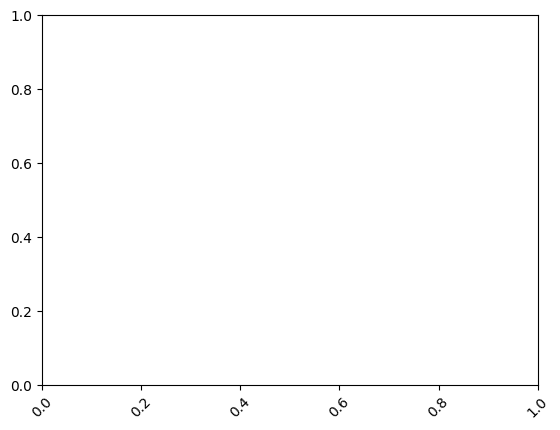

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

team_ranking = pd.read_excel('Rankings_and_results_v_1.xlsx')

# Replace this with your actual team name
# teams_list = [
#     "Argentina",
#     "Australia",
#     "Chile",
#     "England",
#     "Fiji",
#     "France",
#     "Georgia",
#     "Ireland",
#     "Italy",
#     "Japan",
#     "Namibia",
#     "New Zealand",
#     "Portugal",
#     "Romania",
#     "Samoa",
#     "Scotland",
#     "South Africa",
#     "Tonga",
#     "Uruguay",
#     "Wales"
# ]

contenders = [
    "Ireland",
    "South Africa",
    "France",
    "New Zealand",
    "Scotland",
    "Argentina",
    "Fiji",
    "England"
]
# Create a plot


# Customize the x-axis labels with dates
plt.xticks(rotation=45)

plt.figure(figsize=(30, 20))
plt.title("Scores Over Time")
plt.xlabel("Date")
plt.ylabel("Score")
plt.grid(True)


for team in contenders:
    
    
    # Filter the DataFrame for the specified team in both Team1 and Team2 columns
    team_data = team_ranking[(team_ranking["Team1"] == team) | (team_ranking["Team2"] == team)]

    # Extract the dates and scores for the selected team
    dates = pd.to_datetime(team_data["Date"])
    scores = np.where(team_data["Team1"] == team, team_data["Team1Pts"], team_data["Team2Pts"])
    plt.plot(dates, scores, label=team)

# Show the plot
plt.legend()
plt.savefig('scores.pdf')
plt.show()  
